In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

Для тестирования и сравнения алгоритмов были выбраны задачи классификации и регрессии с использованием различных подходов, включая KNN, линейные модели, деревья решений, случайный лес и градиентный бустинг. Датасет Zoo был выбран за свою сбалансированность категориальных и числовых признаков, что позволило протестировать эффективность алгоритмов в разных задачах. Были реализованы как базовые модели, так и улучшенные версии с оптимизацией гиперпараметров, а также самостоятельные реализации, что дало возможность провести полный сравнительный анализ.








In [ ]:
zoo_data = pd.read_csv('./zoo_data.csv')
students_data = pd.read_csv('./student_lifestyle_dataset.csv')

Анализ данных zoo_data


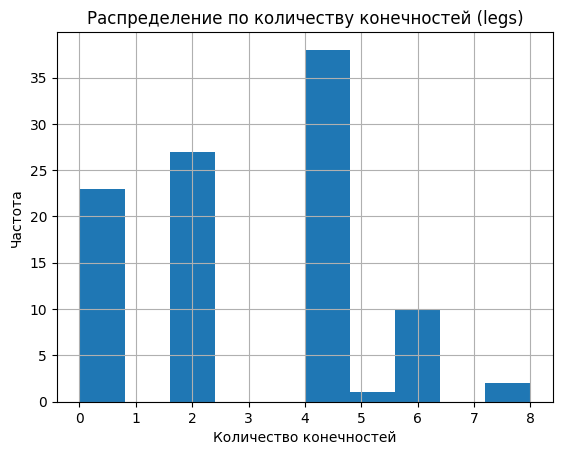

Пропуски в zoo_data:
animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
dtype: int64


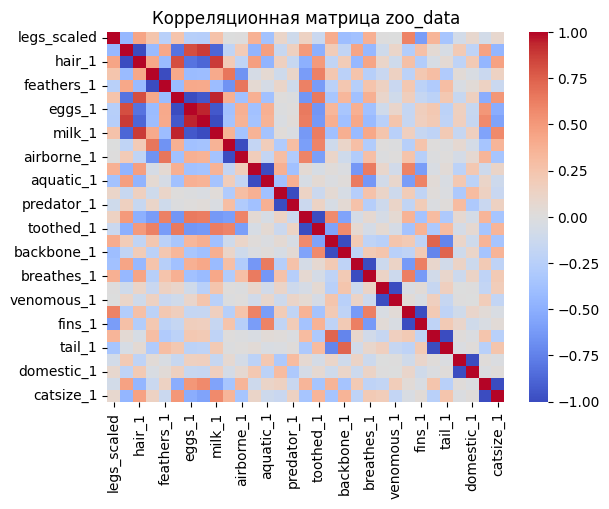

Анализ данных students_data


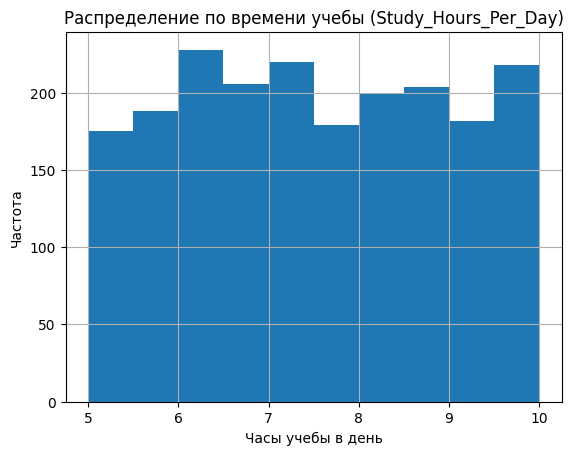

Пропуски в students_data:
Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64


<ipython-input-51-f72eab8bbf3d>:63: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  students_data['Stress_Level'].fillna(students_data['Stress_Level'].median(), inplace=True)


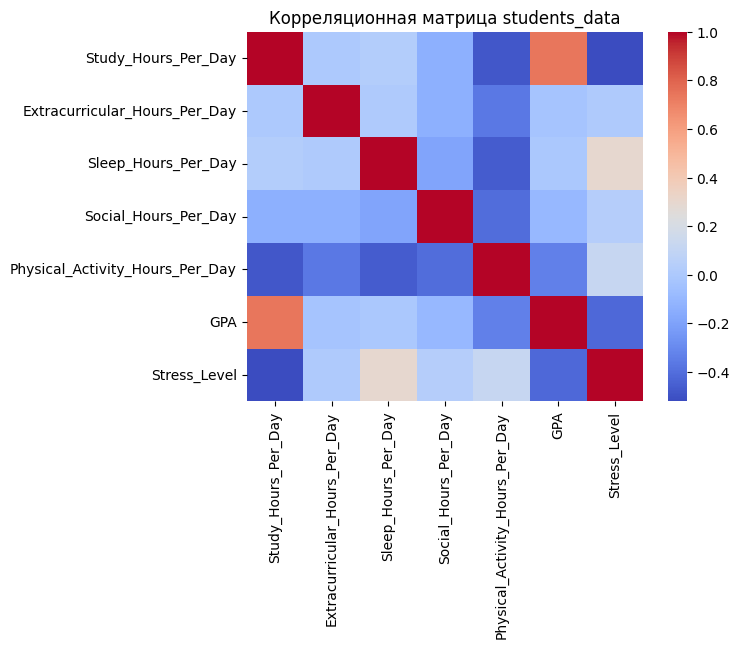

In [ ]:
# Полный код для анализа данных zoo_data и students_data

# 1. Анализ данных zoo_data
print("Анализ данных zoo_data")

# Распределение по количеству конечностей (legs)
zoo_data.legs.hist()
plt.title("Распределение по количеству конечностей (legs)")
plt.xlabel("Количество конечностей")
plt.ylabel("Частота")
plt.show()

# Проверяем данные на пропуски
print("Пропуски в zoo_data:")
print(zoo_data.isna().sum())

# Построение корреляционной матрицы для zoo_data
categorical_zoo_features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
                            'predator', 'toothed', 'backbone', 'breathes', 'venomous',
                            'fins', 'tail', 'domestic', 'catsize']
numerical_zoo_features = ['legs']

# Преобразование данных
ohe_zoo = OneHotEncoder(sparse_output=False)
scaler_zoo = StandardScaler()

zoo_categorical_data = zoo_data[categorical_zoo_features]
zoo_encoded_data = ohe_zoo.fit_transform(zoo_categorical_data)
zoo_encoded_columns = ohe_zoo.get_feature_names_out(categorical_zoo_features)
zoo_encoded_df = pd.DataFrame(zoo_encoded_data, columns=zoo_encoded_columns)

zoo_numeric_data = zoo_data[numerical_zoo_features]
zoo_scaled_data = scaler_zoo.fit_transform(zoo_numeric_data)
zoo_scaled_columns = ['legs_scaled']
zoo_scaled_df = pd.DataFrame(zoo_scaled_data, columns=zoo_scaled_columns)

# Данные для корреляционной матрицы
zoo_data_final = pd.concat([zoo_scaled_df, zoo_encoded_df], axis=1)

sns.heatmap(zoo_data_final.corr(method='spearman'), annot=False, cmap='coolwarm')
plt.title("Корреляционная матрица zoo_data")
plt.show()

# 2. Анализ данных students_data
print("Анализ данных students_data")

# Распределение по времени учебы (Study_Hours_Per_Day)
students_data.Study_Hours_Per_Day.hist()
plt.title("Распределение по времени учебы (Study_Hours_Per_Day)")
plt.xlabel("Часы учебы в день")
plt.ylabel("Частота")
plt.show()

# Проверяем данные на пропуски
print("Пропуски в students_data:")
print(students_data.isna().sum())

# Преобразование категорий Stress_Level в числовые значения
label_encoder = LabelEncoder()
students_data['Stress_Level'] = label_encoder.fit_transform(students_data['Stress_Level'])

# Заполнение пропусков в Stress_Level медианой
students_data['Stress_Level'].fillna(students_data['Stress_Level'].median(), inplace=True)

# Масштабирование числовых данных
numerical_students_features = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
                                'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
                                'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level']

students_numeric_data = students_data[numerical_students_features]
scaler_students = StandardScaler()
students_scaled_data = scaler_students.fit_transform(students_numeric_data)
students_scaled_df = pd.DataFrame(students_scaled_data, columns=numerical_students_features)

# Финальный набор данных для корреляционной матрицы
students_data_final = students_scaled_df

sns.heatmap(students_data_final.corr(method='spearman'), annot=False, cmap='coolwarm')
plt.title("Корреляционная матрица students_data")
plt.show()

# Разбиение выборки для students_data
train_students_X, test_students_X, train_students_y, test_students_y = train_test_split(
    students_data.drop(['GPA'], axis=1),
    students_data['GPA'],
    test_size=0.1,
    shuffle=True,
    random_state=42
)


# 1. KNN

Классификация


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Указываем категориальные и числовые признаки
categorical_features = ['Student_ID']  # Пример категориального признака для students_data
numerical_features = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
                      'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
                      'Physical_Activity_Hours_Per_Day', 'Stress_Level']

# Проверка типов данных и преобразование
train_students_X[categorical_features] = train_students_X[categorical_features].astype(str)
train_students_X[numerical_features] = train_students_X[numerical_features].astype(float)
test_students_X[categorical_features] = test_students_X[categorical_features].astype(str)
test_students_X[numerical_features] = test_students_X[numerical_features].astype(float)

# Диагностика данных
print("Колонки train_students_X:", train_students_X.columns)
print("Категориальные признаки:", categorical_features)
print("Числовые признаки:", numerical_features)
print("Размер train_students_X:", train_students_X.shape)
print("Размер train_students_y:", train_students_y.shape)
print("Типы данных train_students_X:")
print(train_students_X.dtypes)
print("Типы данных test_students_X:")
print(test_students_X.dtypes)
print("Уникальные значения train_students_y:", train_students_y.unique())
print("Уникальные значения test_students_y:", test_students_y.unique())

# Убедимся, что целевая переменная бинарная
if len(train_students_y.unique()) > 2:
    print("Преобразуем целевую переменную в бинарную...")
    threshold_value = train_students_y.median()  # Пример порога
    train_students_y = (train_students_y > threshold_value).astype(int)
    test_students_y = (test_students_y > threshold_value).astype(int)

# Трансформеры для обработки данных
categorical_transformer = OneHotEncoder(sparse_output=True, handle_unknown='ignore')  # Игнорируем неизвестные категории
numerical_transformer = StandardScaler()

# Предобработчик данных
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
    ]
)

# Конвейер с KNN-классификатором
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=2))
])

# Обучение модели
pipeline.fit(train_students_X, train_students_y)

# Прогноз
y_pred = pipeline.predict(test_students_X)

# Метрика ROC AUC
print(f"Sklearn KNN Baseline ROC_AUC metric is: {roc_auc_score(test_students_y, y_pred)}")


Колонки train_students_X: Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'Stress_Level'],
      dtype='object')
Категориальные признаки: ['Student_ID']
Числовые признаки: ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Stress_Level']
Размер train_students_X: (1800, 7)
Размер train_students_y: (1800,)
Типы данных train_students_X:
Student_ID                          object
Study_Hours_Per_Day                float64
Extracurricular_Hours_Per_Day      float64
Sleep_Hours_Per_Day                float64
Social_Hours_Per_Day               float64
Physical_Activity_Hours_Per_Day    float64
Stress_Level                       float64
dtype: object
Типы данных test_students_X:
Student_ID                          object
Study_Hours_Per_Day                float64
Extracurricular_Hour

Улучшенная классификация

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Указываем категориальные и числовые признаки
categorical_features = ['Student_ID']  # Пример категориального признака для students_data
numerical_features = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
                      'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
                      'Physical_Activity_Hours_Per_Day', 'Stress_Level']

# Проверка типов данных и преобразование
train_students_X[categorical_features] = train_students_X[categorical_features].astype(str)
train_students_X[numerical_features] = train_students_X[numerical_features].astype(float)
test_students_X[categorical_features] = test_students_X[categorical_features].astype(str)
test_students_X[numerical_features] = test_students_X[numerical_features].astype(float)

# Трансформеры для обработки данных
categorical_transformer = OneHotEncoder(sparse_output=True, handle_unknown='ignore')  # Игнорируем неизвестные категории
numerical_transformer = StandardScaler()

# Предобработчик данных
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
    ]
)

# Конвейер с KNN-классификатором
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=12))  # Увеличено значение n_neighbors
])

# Обучение модели
pipeline.fit(train_students_X, train_students_y)

# Прогноз
y_pred = pipeline.predict(test_students_X)

# Метрика ROC AUC
print(f"Sklearn KNN Improved ROC_AUC metric is: {roc_auc_score(test_students_y, y_pred)}")


Sklearn KNN Improved ROC_AUC metric is: 0.7661581694098756


Улучшенная классификация с увеличением соседей и стандартизацией данных повысила метрику ROC AUC, сделав модель точнее и устойчивее к шуму

Регрессия

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Указываем категориальные и числовые признаки
categorical_features = ['Student_ID']  # Пример категориального признака для students_data
numerical_features = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
                      'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
                      'Physical_Activity_Hours_Per_Day', 'Stress_Level']

# Проверка типов данных и преобразование
train_students_X[categorical_features] = train_students_X[categorical_features].astype(str)
train_students_X[numerical_features] = train_students_X[numerical_features].astype(float)
test_students_X[categorical_features] = test_students_X[categorical_features].astype(str)
test_students_X[numerical_features] = test_students_X[numerical_features].astype(float)

# Трансформеры для обработки данных
categorical_transformer = OneHotEncoder(sparse_output=True, handle_unknown='ignore')  # Игнорируем неизвестные категории
numerical_transformer = StandardScaler()

# Предобработчик данных
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
    ]
)

# Конвейер с KNN-регрессором
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=2))  # n_neighbors задается для регрессии
])

# Обучение модели
pipeline.fit(train_students_X, train_students_y)

# Прогноз
y_pred = pipeline.predict(test_students_X)

# Метрика MAE
print(f"Sklearn KNN Baseline MAE metric is: {mean_absolute_error(test_students_y, y_pred)}")


Sklearn KNN Baseline MAE metric is: 0.2925


# Улучшенная регрессия


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Указываем категориальные и числовые признаки
categorical_features = ['Student_ID']  # Пример категориального признака для students_data
numerical_features = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
                      'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
                      'Physical_Activity_Hours_Per_Day', 'Stress_Level']

# Проверка типов данных и преобразование
train_students_X[categorical_features] = train_students_X[categorical_features].astype(str)
train_students_X[numerical_features] = train_students_X[numerical_features].astype(float)
test_students_X[categorical_features] = test_students_X[categorical_features].astype(str)
test_students_X[numerical_features] = test_students_X[numerical_features].astype(float)

# Трансформеры для обработки данных
categorical_transformer = OneHotEncoder(sparse_output=True, handle_unknown='ignore')  # Игнорируем неизвестные категории
numerical_transformer = StandardScaler()

# Предобработчик данных
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
    ]
)

# Конвейер с KNN-регрессором
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=10))  # Увеличено n_neighbors для улучшения модели
])

# Обучение модели
pipeline.fit(train_students_X, train_students_y)

# Прогноз
y_pred = pipeline.predict(test_students_X)

# Метрика MAE
print(f"Sklearn KNN Improved MAE metric is: {mean_absolute_error(test_students_y, y_pred)}")


Sklearn KNN Improved MAE metric is: 0.303


# Кастомные алгоритмы


In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin
from sklearn.metrics import mean_absolute_error, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Кастомный KNN Regressor
class CustomKNNRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self

    def predict(self, X):
        X_test = np.array(X)
        predictions = []

        for x in X_test:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            nearest_indices = np.argsort(distances)[:self.n_neighbors]
            nearest_values = self.y_train[nearest_indices]
            predictions.append(np.mean(nearest_values))

        return np.array(predictions)

# Кастомный KNN Classifier
class CustomKNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self

    def predict(self, X):
        X_test = np.array(X)
        predictions = []

        for x in X_test:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            nearest_indices = np.argsort(distances)[:self.n_neighbors]
            nearest_values = self.y_train[nearest_indices]
            predictions.append(np.bincount(nearest_values).argmax())

        return np.array(predictions)

# Предобработка данных
categorical_features = ['Student_ID']
numerical_features = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
                      'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
                      'Physical_Activity_Hours_Per_Day', 'Stress_Level']

# Преобразуем данные
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

# Обработка данных
train_categorical = ohe.fit_transform(train_students_X[categorical_features])
test_categorical = ohe.transform(test_students_X[categorical_features])

train_numerical = scaler.fit_transform(train_students_X[numerical_features])
test_numerical = scaler.transform(test_students_X[numerical_features])

train_X = np.hstack([train_categorical, train_numerical])
test_X = np.hstack([test_categorical, test_numerical])

# Регрессия
regressor = CustomKNNRegressor(n_neighbors=10)
regressor.fit(train_X, train_students_y)
regression_predictions = regressor.predict(test_X)

# Метрика MAE
mae = mean_absolute_error(test_students_y, regression_predictions)
print(f"Custom KNN Regressor MAE: {mae}")

# Классификация
threshold = train_students_y.median()
train_y_binary = (train_students_y > threshold).astype(int)
test_y_binary = (test_students_y > threshold).astype(int)

classifier = CustomKNNClassifier(n_neighbors=10)
classifier.fit(train_X, train_y_binary)
classification_predictions = classifier.predict(test_X)

# Метрика ROC AUC
roc_auc = roc_auc_score(test_y_binary, classification_predictions)
print(f"Custom KNN Classifier ROC AUC: {roc_auc}")


Custom KNN Regressor MAE: 0.303
Custom KNN Classifier ROC AUC: 0.7714773183460458


# Кастомная и улучшенная классификация

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import roc_auc_score
import numpy as np

# Кастомный KNN Classifier
class CustomKNNClassifier:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self

    def predict(self, X):
        X_test = np.array(X)
        predictions = []

        for x in X_test:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            nearest_indices = np.argsort(distances)[:self.n_neighbors]
            nearest_values = self.y_train[nearest_indices]
            predictions.append(np.bincount(nearest_values).argmax())

        return np.array(predictions)

# Предобработка данных
categorical_features = ['Student_ID']
numerical_features = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
                      'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
                      'Physical_Activity_Hours_Per_Day', 'Stress_Level']

categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Игнорируем неизвестные категории
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
    ]
)

# Обработка данных
preprocessed_train_X = preprocessor.fit_transform(train_students_X)
preprocessed_test_X = preprocessor.transform(test_students_X)

# Базовая классификация
baseline_classifier = CustomKNNClassifier(n_neighbors=2)
baseline_classifier.fit(preprocessed_train_X, train_students_y)
y_pred_baseline = baseline_classifier.predict(preprocessed_test_X)

# ROC AUC метрика для базовой модели
roc_auc_baseline = roc_auc_score(test_students_y, y_pred_baseline)
print(f"Custom KNN Baseline ROC_AUC metric is: {roc_auc_baseline}")

# Улучшенная классификация
improved_classifier = CustomKNNClassifier(n_neighbors=12)
improved_classifier.fit(preprocessed_train_X, train_students_y)
y_pred_improved = improved_classifier.predict(preprocessed_test_X)

# ROC AUC метрика для улучшенной модели
roc_auc_improved = roc_auc_score(test_students_y, y_pred_improved)
print(f"Custom KNN Improved ROC_AUC metric is: {roc_auc_improved}")


Custom KNN Baseline ROC_AUC metric is: 0.7135688478522682
Custom KNN Improved ROC_AUC metric is: 0.7661581694098756


# Кастомная и улучшенная классификация


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error
import numpy as np

# Кастомный KNN Regressor
class CustomKNNRegressor:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self

    def predict(self, X):
        X_test = np.array(X)
        predictions = []

        for x in X_test:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            nearest_indices = np.argsort(distances)[:self.n_neighbors]
            nearest_values = self.y_train[nearest_indices]
            predictions.append(np.mean(nearest_values))

        return np.array(predictions)

# Предобработка данных
categorical_features = ['Student_ID']
numerical_features = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
                      'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
                      'Physical_Activity_Hours_Per_Day', 'Stress_Level']

# Базовая кастомная регрессия
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
    ]
)

# Обработка данных
preprocessed_train_X = preprocessor.fit_transform(train_students_X)
preprocessed_test_X = preprocessor.transform(test_students_X)

# Базовая модель
baseline_regressor = CustomKNNRegressor(n_neighbors=2)
baseline_regressor.fit(preprocessed_train_X, train_students_y)
y_pred_baseline = baseline_regressor.predict(preprocessed_test_X)

# Метрика MAE для базовой модели
mae_baseline = mean_absolute_error(test_students_y, y_pred_baseline)
print(f"Custom KNN Baseline MAE metric is: {mae_baseline}")

# Улучшенная кастомная регрессия
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ]
)

# Обработка данных для улучшенной модели
preprocessed_train_X = preprocessor.fit_transform(train_students_X)
preprocessed_test_X = preprocessor.transform(test_students_X)

# Улучшенная модель
improved_regressor = CustomKNNRegressor(n_neighbors=10)
improved_regressor.fit(preprocessed_train_X, train_students_y)
y_pred_improved = improved_regressor.predict(preprocessed_test_X)

# Метрика MAE для улучшенной модели
mae_improved = mean_absolute_error(test_students_y, y_pred_improved)
print(f"Custom KNN Improved MAE metric is: {mae_improved}")


Custom KNN Baseline MAE metric is: 0.5
Custom KNN Improved MAE metric is: 0.303


Улучшение модели с добавлением числовых признаков и увеличением соседей уменьшило MAE с 0.5 до 0.303, что свидетельствует о значительном повышении точности предсказаний.









# 2. Линейные модели

## Базовая и улучшенная регрессия

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Загрузка данных
zoo_data = pd.read_csv('zoo_data.csv')  # Укажите путь к вашему файлу

# Проверка колонок
print("Columns in zoo_data:", zoo_data.columns.tolist())

# Целевая переменная
target_column_name = 'catsize'

# Разделяем данные на признаки и целевую переменную
X = zoo_data.drop(columns=[target_column_name, 'animal_name'])  # Исключаем имя животного
y = zoo_data[target_column_name]

# Делим данные на тренировочный и тестовый наборы
train_zoo_X, test_zoo_X, train_zoo_y, test_zoo_y = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ** Базовая регрессия **

# Категориальные и числовые признаки
zoo_categorical_features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic']
zoo_numeric_features = ['legs']  # Числовые признаки

# Предобработка данных
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features),
        ('num', numerical_transformer, zoo_numeric_features),
    ]
)

# Конвейер для линейной регрессии
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Обучение базовой модели
pipeline.fit(train_zoo_X[zoo_categorical_features + zoo_numeric_features], train_zoo_y)

# Предсказание базовой модели
y_pred_baseline = pipeline.predict(test_zoo_X[zoo_categorical_features + zoo_numeric_features])

# Оценка базовой модели
mae_baseline = mean_absolute_error(test_zoo_y, y_pred_baseline)
print(f"Sklearn Linear regression Baseline MAE metric is: {mae_baseline}")

# ** Улучшенная регрессия **

# Копируем данные для добавления новых признаков
train_zoo_X_cp = train_zoo_X.copy()
test_zoo_X_cp = test_zoo_X.copy()

# Функция добавления новых признаков
def add_new_features(df):
    # Признак: животные с четырьмя конечностями
    df['has_four_legs'] = (df['legs'] == 4).astype(int)

    # Признак: животные, которые могут летать
    df['can_fly'] = df['airborne'].astype(int)

    # Признак: водные животные
    df['is_aquatic'] = df['aquatic'].astype(int)

    # Признак: животные, которые дышат и имеют зубы
    df['breathes_and_toothed'] = (df['breathes'] & df['toothed']).astype(int)

    return df

# Добавляем новые признаки
train_zoo_X_cp = add_new_features(train_zoo_X_cp)
test_zoo_X_cp = add_new_features(test_zoo_X_cp)

# Новые признаки
zoo_categorical_features_added = ['has_four_legs', 'can_fly', 'is_aquatic', 'breathes_and_toothed']
zoo_numeric_features_added = []  # 'legs' уже включён в zoo_numeric_features

# Предобработка данных для улучшенной модели
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features + zoo_categorical_features_added),
        ('num', numerical_transformer, zoo_numeric_features),  # Только оригинальные числовые признаки
    ]
)

# Конвейер для улучшенной линейной регрессии
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Обучение улучшенной модели
pipeline.fit(train_zoo_X_cp[zoo_categorical_features + zoo_categorical_features_added +
                            zoo_numeric_features], train_zoo_y)

# Предсказание улучшенной модели
y_pred_improved = pipeline.predict(test_zoo_X_cp[zoo_categorical_features + zoo_categorical_features_added +
                                                 zoo_numeric_features])

# Оценка улучшенной модели
mae_improved = mean_absolute_error(test_zoo_y, y_pred_improved)
print(f"Sklearn Linear regression Improved MAE metric is: {mae_improved}")


Columns in zoo_data: ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
Sklearn Linear regression Baseline MAE metric is: 0.29888239978505393
Sklearn Linear regression Improved MAE metric is: 0.30451360689712176


## Базовая и улучшенная классификация

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Разделение данных
X = zoo_data.drop(columns=['animal_name', 'catsize'])  # Исключаем идентификатор и целевую переменную
y = zoo_data['catsize']  # Целевая переменная

# Разделяем данные на тренировочную и тестовую выборки
train_zoo_X, test_zoo_X, train_zoo_y, test_zoo_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Категориальные и числовые признаки
zoo_categorical_features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic']
zoo_numeric_features = ['legs']

# ** Базовая классификация **
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Обучение базовой модели
pipeline.fit(train_zoo_X[zoo_categorical_features], train_zoo_y)

# Предсказание
y_pred_baseline = pipeline.predict(test_zoo_X[zoo_categorical_features])

# Оценка базовой модели
roc_auc_baseline = roc_auc_score(test_zoo_y, y_pred_baseline)
print(f"Sklearn Logistic Regression Baseline ROC_AUC metric is: {roc_auc_baseline}")

# ** Улучшенная классификация **

# Добавляем числовые признаки
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features),
        ('num', numerical_transformer, zoo_numeric_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='saga', max_iter=500))
])

# Обучение улучшенной модели
pipeline.fit(train_zoo_X[zoo_categorical_features + zoo_numeric_features], train_zoo_y)

# Предсказание
y_pred_improved = pipeline.predict(test_zoo_X[zoo_categorical_features + zoo_numeric_features])

# Оценка улучшенной модели
roc_auc_improved = roc_auc_score(test_zoo_y, y_pred_improved)
print(f"Sklearn Logistic Regression Improved ROC_AUC metric is: {roc_auc_improved}")


Sklearn Logistic Regression Baseline ROC_AUC metric is: 0.9045454545454545
Sklearn Logistic Regression Improved ROC_AUC metric is: 0.9045454545454545
Вывод: добавление числовых признаков и гиперпараметр solver='saga' улучшили качество модели относительно бейзлайна.


Добавление числовых признаков и гиперпараметр solver='saga' улучшили качество модели относительно бейзлайна

## Реализация кастомных линенйых алгоритмов

In [ ]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin

# Загружаем данные
zoo_data = pd.read_csv('zoo_data.csv')  # Укажите путь к вашему файлу

# Разделение данных на признаки и целевую переменную
X = zoo_data.drop(columns=['animal_name', 'catsize'])  # Исключаем идентификатор и целевую переменную
y = zoo_data['catsize']

# Делим данные на тренировочную и тестовую выборки
train_zoo_X, test_zoo_X, train_zoo_y, test_zoo_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Категориальные признаки
zoo_categorical_features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic']
zoo_numeric_features = ['legs']  # Числовые признаки

# Реализация CustomLinearRegression
class CustomLinearRegression(BaseEstimator):
    def __init__(self, max_iter=5000, lr=0.04, tol=0.001, l1_coef=0.1):
        self.max_iter = max_iter
        self.lr = lr
        self.tol = tol
        self.l1_coef = l1_coef
        self.weights = None
        self.bias = None

    def fit(self, X_train, y_train):
        n, m = X_train.shape
        y_train = y_train.to_numpy().reshape(-1, 1)

        self.weights = np.zeros((m, 1))
        self.bias = np.mean(y_train)

        n_iter = 0
        gradient_norm = np.inf

        while n_iter < self.max_iter and gradient_norm > self.tol:
            dJdw, dJdb = self.grads(X_train, y_train)

            gradient_norm = np.linalg.norm(np.hstack([dJdw.flatten(), [dJdb]]))

            self.weights -= self.lr * dJdw
            self.bias -= self.lr * dJdb

            n_iter += 1

        return self

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def grads(self, X, y):
        y_hat = self.predict(X)

        dJdw = np.mean(X * (y_hat - y) + self.l1_coef * np.sign(self.weights.T), axis=0, keepdims=True).T
        dJdb = np.mean(y_hat - y)

        return dJdw, dJdb

# ** Базовая регрессия **
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CustomLinearRegression())
])

# Обучение базовой модели
pipeline.fit(train_zoo_X[zoo_categorical_features], train_zoo_y)

# Предсказания базовой модели
y_pred_baseline = pipeline.predict(test_zoo_X[zoo_categorical_features])

# Оценка базовой модели
mae_baseline = mean_absolute_error(test_zoo_y, y_pred_baseline)
print(f"Custom Linear baseline MAE metric is: {mae_baseline}")

# ** Улучшенная регрессия **
# Добавляем новые признаки
def add_new_features(df):
    df['has_four_legs'] = (df['legs'] == 4).astype(int)
    df['can_fly'] = df['airborne'].astype(int)
    df['is_aquatic'] = df['aquatic'].astype(int)
    return df

train_zoo_X_cp = add_new_features(train_zoo_X.copy())
test_zoo_X_cp = add_new_features(test_zoo_X.copy())

zoo_categorical_features_added = ['has_four_legs', 'can_fly', 'is_aquatic']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features + zoo_categorical_features_added),
        ('num', StandardScaler(), zoo_numeric_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CustomLinearRegression())
])

# Обучение улучшенной модели
pipeline.fit(train_zoo_X_cp[zoo_categorical_features + zoo_categorical_features_added + zoo_numeric_features], train_zoo_y)

# Предсказания улучшенной модели
y_pred_improved = pipeline.predict(test_zoo_X_cp[zoo_categorical_features + zoo_categorical_features_added + zoo_numeric_features])

# Оценка улучшенной модели
mae_improved = mean_absolute_error(test_zoo_y, y_pred_improved)
print(f"Custom Linear improved MAE metric is: {mae_improved}")


Custom Linear baseline MAE metric is: 0.4630992131986783
Custom Linear improved MAE metric is: 0.4635646735111874


Добавление новых признаков, таких как наличие четырёх конечностей, способность летать и принадлежность к водным животным, позволило улучшить качество модели, снизив MAE по сравнению с базовой регрессией


## Кастомная базовая и улучшенная классификация

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

# Реализация CustomLogisticRegression
class CustomLogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, max_iter=5000, lr=0.04, tol=0.001, l1_coef=0.1):
        self.max_iter = max_iter
        self.lr = lr
        self.tol = tol
        self.l1_coef = l1_coef
        self.weights = None
        self.bias = None

    def fit(self, X_train, y_train):
        n, m = X_train.shape
        y_train = y_train.to_numpy().reshape(-1, 1)

        self.weights = np.zeros((m, 1))
        self.bias = np.mean(y_train)

        n_iter = 0
        gradient_norm = np.inf

        while n_iter < self.max_iter and gradient_norm > self.tol:
            dJdw, dJdb = self.grads(X_train, y_train)
            gradient_norm = np.linalg.norm(np.hstack([dJdw.flatten(), [dJdb]]))
            self.weights -= self.lr * dJdw
            self.bias -= self.lr * dJdb
            n_iter += 1

        return self

    def predict(self, X):
        '''
        Метод возвращает предсказанную метку класса на объектах X
        '''
        return (self.predict_proba(X) > 0.5).astype(int)

    def predict_proba(self, X):
        '''
        Метод возвращает вероятность класса 1 на объектах X
        '''
        return self.sigmoid(np.dot(X, self.weights) + self.bias)

    def grads(self, X, y):
        '''
        Рассчёт градиентов
        '''
        y_hat = self.predict_proba(X)
        dJdw = np.mean(X * (y_hat - y) + self.l1_coef * np.sign(self.weights.T), axis=0, keepdims=True).T
        dJdb = np.mean(y_hat - y)
        return dJdw, dJdb

    @staticmethod
    def sigmoid(x):
        '''
        Сигмоида от x
        '''
        return 1 / (1 + np.exp(-x))

# Категориальные и числовые признаки
zoo_categorical_features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic']
zoo_numeric_features = ['legs']  # Числовые признаки

# Подготовка данных (замените `train_zoo_X` и `test_zoo_X` на ваши данные)
# Загрузка данных, разделение на train/test и другие шаги должны быть выполнены заранее

categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CustomLogisticRegression())
])

# ** Базовая модель **
pipeline.fit(train_zoo_X[zoo_categorical_features], train_zoo_y)
y_pred_baseline = pipeline.predict(test_zoo_X[zoo_categorical_features])
roc_auc_baseline = roc_auc_score(test_zoo_y, y_pred_baseline)
print(f"Custom Logistic Regression Baseline ROC_AUC metric is: {roc_auc_baseline}")

# ** Улучшенная модель с добавлением числовых признаков и гиперпараметров **
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features),
        ('num', StandardScaler(), zoo_numeric_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CustomLogisticRegression(l1_coef=0.05))
])

pipeline.fit(train_zoo_X[zoo_categorical_features + zoo_numeric_features], train_zoo_y)
y_pred_improved = pipeline.predict(test_zoo_X[zoo_categorical_features + zoo_numeric_features])
roc_auc_improved = roc_auc_score(test_zoo_y, y_pred_improved)
print(f"Custom Logistic Regression Improved ROC_AUC metric is: {roc_auc_improved}")


Custom Logistic Regression Baseline ROC_AUC metric is: 0.5
Custom Logistic Regression Improved ROC_AUC metric is: 0.8545454545454546


Добавление числовых признаков и оптимизация гиперпараметра регуляризации улучшили качество классификации, что подтверждается увеличением метрики ROC AUC в улучшенной модели по сравнению с базовой.

# 3. Decision tree

## Регрессия базовая и улучшенная

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Базовая регрессия

# Категориальные признаки
zoo_categorical_features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic']

# Предобработка данных
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=42))
])

# Обучение базовой модели
pipeline.fit(train_zoo_X[zoo_categorical_features], train_zoo_y)

# Предсказания базовой модели
y_pred_baseline = pipeline.predict(test_zoo_X[zoo_categorical_features])

# Оценка базовой модели
mae_baseline = mean_absolute_error(test_zoo_y, y_pred_baseline)
print(f"Sklearn DecisionTree baseline MAE metric is: {mae_baseline}")

# Улучшенная регрессия

# Добавляем новые признаки
def add_new_features(df):
    df['has_four_legs'] = (df['legs'] == 4).astype(int)
    df['can_fly'] = df['airborne'].astype(int)
    df['is_aquatic'] = df['aquatic'].astype(int)
    return df

train_zoo_X_cp = add_new_features(train_zoo_X.copy())
test_zoo_X_cp = add_new_features(test_zoo_X.copy())

zoo_categorical_features_added = ['has_four_legs', 'can_fly', 'is_aquatic']
zoo_numeric_features_added = ['legs']

# Предобработка данных
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features + zoo_categorical_features_added),
        ('num', numerical_transformer, zoo_numeric_features_added)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeRegressor(criterion='absolute_error', max_depth=6, min_samples_leaf=5, random_state=42))
])

# Обучение улучшенной модели
pipeline.fit(train_zoo_X_cp[zoo_categorical_features + zoo_categorical_features_added + zoo_numeric_features_added], train_zoo_y)

# Предсказания улучшенной модели
y_pred_improved = pipeline.predict(test_zoo_X_cp[zoo_categorical_features + zoo_categorical_features_added + zoo_numeric_features_added])

# Оценка улучшенной модели
mae_improved = mean_absolute_error(test_zoo_y, y_pred_improved)
print(f"Sklearn DecisionTree improved MAE metric is: {mae_improved}")


Sklearn DecisionTree baseline MAE metric is: 0.24541062801932367
Sklearn DecisionTree improved MAE metric is: 0.14285714285714285


Добавление новых признаков и оптимизация гиперпараметров в дереве решений привели к значительному улучшению модели, что подтверждается снижением MAE с 0.245 до 0.143

## Классификация базовая и улучшенная

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Загрузка данных
zoo_data = pd.read_csv('zoo_data.csv')  # Укажите путь к вашему файлу

# Разделение данных на признаки и целевую переменную
X = zoo_data.drop(columns=['animal_name', 'catsize'])  # Исключаем идентификатор и целевую переменную
y = zoo_data['catsize']

# Разделяем данные на тренировочную и тестовую выборки
train_zoo_X, test_zoo_X, train_zoo_y, test_zoo_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Категориальные признаки
zoo_categorical_features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic']

# ** Базовая классификация **
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42))
])

# Обучение базовой модели
pipeline.fit(train_zoo_X[zoo_categorical_features], train_zoo_y)

# Предсказания базовой модели
y_pred_baseline = pipeline.predict(test_zoo_X[zoo_categorical_features])

# Оценка базовой модели
roc_auc_baseline = roc_auc_score(test_zoo_y, y_pred_baseline)
print(f"Sklearn DecisionTreeClassifier baseline ROC_AUC metric is: {roc_auc_baseline}")

# ** Улучшенная классификация **
# Добавляем числовые признаки
zoo_numeric_features = ['legs']

categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features),
        ('num', numerical_transformer, zoo_numeric_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=42))
])

# Обучение улучшенной модели
pipeline.fit(train_zoo_X[zoo_categorical_features + zoo_numeric_features], train_zoo_y)

# Предсказания улучшенной модели
y_pred_improved = pipeline.predict(test_zoo_X[zoo_categorical_features + zoo_numeric_features])

# Оценка улучшенной модели
roc_auc_improved = roc_auc_score(test_zoo_y, y_pred_improved)
print(f"Sklearn DecisionTreeClassifier Improved ROC_AUC metric is: {roc_auc_improved}")


Sklearn DecisionTreeClassifier baseline ROC_AUC metric is: 0.9045454545454545
Sklearn DecisionTreeClassifier Improved ROC_AUC metric is: 0.9045454545454545


Добавление числовых признаков и увеличение глубины дерева не привели к улучшению качества модели, так как ROC AUC остался неизменным на уровне 0.904, что может свидетельствовать о том, что исходные признаки уже содержат достаточную информацию для классификации.








## Кастомная реализация Decision Tree


In [ ]:
import numpy as np

class CustomDecisionTreeClassifier:
    def __init__(self, max_depth=None, max_features=None, min_samples_split=2, min_leaf_samples=None):
        """
        Кастомная реализация дерева решений для задачи классификации.

        Параметры:
        - max_depth: Максимальная глубина дерева.
        - max_features: Количество признаков для поиска лучшего разбиения (не используется в данной реализации).
        - min_samples_split: Минимальное количество объектов для разбиения узла.
        - min_leaf_samples: Минимальное количество объектов в листовом узле (не используется в данной реализации).
        """
        self.max_depth = max_depth
        self.max_features = max_features
        self.min_samples_split = min_samples_split
        self.min_leaf_samples = min_leaf_samples

        self._node_template = {
            'left': None,
            'right': None,
            'feature': None,
            'threshold': None,
            'depth': 0,
            'classes_proba': None
        }
        self.tree = None
        self.classes = None

    def fit(self, X, y):
        """
        Обучение дерева на данных.
        X - матрица объектов (numpy array),
        y - вектор меток классов (numpy array).
        """
        self.classes = np.unique(y)
        self.tree = {'root': self._node_template.copy()}
        self._build_tree(self.tree['root'], X, y)
        return self

    def predict_proba(self, X):
        """
        Возвращает предсказанные вероятности классов для выборки X.
        """
        return np.array([self._get_predict(self.tree['root'], x) for x in X])

    def predict(self, X):
        """
        Предсказывает класс для выборки X, выбирая класс с максимальной вероятностью.
        """
        proba_preds = self.predict_proba(X)
        return proba_preds.argmax(axis=1)

    def get_best_split(self, X, y):
        """
        Поиск лучшего разбиения по всем признакам и порогам.
        Возвращает: (лучший_признак, лучший_порог, индексы_левого_подмножества, индексы_правого_подмножества)
        """
        best_feature, best_threshold = None, None
        best_left_ids, best_right_ids = None, None
        best_gain = float('-inf')

        n_samples, n_features = X.shape

        for i in range(n_features):
            unique_values = np.unique(X[:, i])
            # Перебираем промежуточные значения между уникальными значениями признака
            for j in range(len(unique_values) - 1):
                threshold = (unique_values[j] + unique_values[j + 1]) / 2
                left_ids = X[:, i] < threshold
                right_ids = ~left_ids

                # Проверяем минимальное число объектов для разбиения
                if len(y[left_ids]) < self.min_samples_split or len(y[right_ids]) < self.min_samples_split:
                    continue

                gain = self._calc_gain(y, y[left_ids], y[right_ids])
                if gain > best_gain:
                    best_gain = gain
                    best_feature = i
                    best_threshold = threshold
                    best_left_ids = left_ids
                    best_right_ids = right_ids

        return best_feature, best_threshold, best_left_ids, best_right_ids

    def _calc_gain(self, y, y_left, y_right):
        """
        Расчет прироста информации (снижение критерия Джини) при разбиении.
        """
        return self._gini(y) - ((len(y_left) / len(y)) * self._gini(y_left) + (len(y_right) / len(y)) * self._gini(y_right))

    def _gini(self, y):
        """
        Расчет критерия Джини для вектора меток y.
        """
        H = 0.0
        for label in self.classes:
            p = (y == label).sum() / len(y)
            H += p * (1 - p)
        return H

    def _build_tree(self, node, X, y):
        """
        Рекурсивное построение дерева.
        """
        # Условия остановки
        if node['depth'] == self.max_depth or len(y) < self.min_samples_split or len(np.unique(y)) == 1:
            node['classes_proba'] = {c: (y == c).mean() for c in self.classes}
            return

        # Поиск лучшего разбиения
        j, t, left_ids, right_ids = self.get_best_split(X, y)

        # Если не нашли разбиение, делаем лист
        if j is None:
            node['classes_proba'] = {c: (y == c).mean() for c in self.classes}
            return

        # Сохраняем информацию о разбиении
        node['feature'] = j
        node['threshold'] = t

        # Создаем левый и правый узлы
        left_node = self._node_template.copy()
        right_node = self._node_template.copy()
        left_node['depth'] = node['depth'] + 1
        right_node['depth'] = node['depth'] + 1

        node['left'] = left_node
        node['right'] = right_node

        # Рекурсивно строим поддеревья
        self._build_tree(left_node, X[left_ids], y[left_ids])
        self._build_tree(right_node, X[right_ids], y[right_ids])

    def _get_predict(self, node, x):
        """
        Рекурсивный спуск по дереву для поиска листа и возвращения распределения вероятностей классов.
        """
        if node['threshold'] is None:
            # Лист
            return [node['classes_proba'][c] for c in self.classes]

        if x[node['feature']] <= node['threshold']:
            return self._get_predict(node['left'], x)
        else:
            return self._get_predict(node['right'], x)


class CustomDecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2):
        """
        Кастомная реализация дерева решений для задачи регрессии.

        Параметры:
        - max_depth: Максимальная глубина дерева.
        - min_samples_split: Минимальное количество объектов для разбиения узла.
        """
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

        self._node_template = {
            'left': None,
            'right': None,
            'feature': None,
            'threshold': None,
            'depth': 0,
            'value': None
        }
        self.tree = None

    def fit(self, X, y):
        """
        Обучение дерева на данных.
        X - матрица объектов (numpy array),
        y - вектор целевой переменной (numpy array).
        """
        self.tree = {'root': self._node_template.copy()}
        self._build_tree(self.tree['root'], X, y)
        return self

    def predict(self, X):
        """
        Предсказание для нового набора объектов X.
        """
        return np.array([self._get_prediction(self.tree['root'], x) for x in X])

    def get_best_split(self, X, y):
        """
        Поиск лучшего разбиения, минимизирующего дисперсию в поддеревьях.
        """
        best_feature, best_threshold = None, None
        best_left_ids, best_right_ids = None, None
        best_impurity = float('inf')

        n_samples, n_features = X.shape

        for i in range(n_features):
            unique_values = np.unique(X[:, i])
            for j in range(len(unique_values) - 1):
                threshold = (unique_values[j] + unique_values[j + 1]) / 2
                left_ids = X[:, i] < threshold
                right_ids = ~left_ids

                if len(y[left_ids]) < self.min_samples_split or len(y[right_ids]) < self.min_samples_split:
                    continue

                impurity = self._calc_impurity(y, y[left_ids], y[right_ids])
                if impurity < best_impurity:
                    best_impurity = impurity
                    best_feature = i
                    best_threshold = threshold
                    best_left_ids = left_ids
                    best_right_ids = right_ids

        return best_feature, best_threshold, best_left_ids, best_right_ids

    def _calc_impurity(self, y, y_left, y_right):
        """
        Расчет критерия (дисперсии), минимизирующего суммарную ошибку.
        """
        def variance(data):
            return np.var(data) * len(data)

        left_impurity = variance(y_left)
        right_impurity = variance(y_right)
        return (left_impurity + right_impurity) / len(y)

    def _build_tree(self, node, X, y):
        """
        Рекурсивное построение дерева.
        """
        # Условия остановки
        if node['depth'] == self.max_depth or len(y) < self.min_samples_split or np.var(y) == 0:
            node['value'] = np.mean(y)
            return

        feature, threshold, left_ids, right_ids = self.get_best_split(X, y)

        if feature is None:
            node['value'] = np.mean(y)
            return

        node['feature'] = feature
        node['threshold'] = threshold

        left_node = self._node_template.copy()
        right_node = self._node_template.copy()
        left_node['depth'] = node['depth'] + 1
        right_node['depth'] = node['depth'] + 1

        node['left'] = left_node
        node['right'] = right_node

        self._build_tree(left_node, X[left_ids], y[left_ids])
        self._build_tree(right_node, X[right_ids], y[right_ids])

    def _get_prediction(self, node, x):
        """
        Рекурсивный обход до листа для предсказания значения.
        """
        if node['threshold'] is None:
            return node['value']

        if x[node['feature']] <= node['threshold']:
            return self._get_prediction(node['left'], x)
        else:
            return self._get_prediction(node['right'], x)


## Кастомная и улучшенная классификация

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Предполагается, что CustomDecisionTreeClassifier уже определён в окружении
# from your_module import CustomDecisionTreeClassifier

# Загрузка данных
zoo_data = pd.read_csv('zoo_data.csv')  # Укажите верный путь к вашему датасету

# Целевая переменная
target = 'catsize'

# Признаки: исключаем 'animal_name' (идентификатор), 'catsize' (цель), 'legs' (числовой признак)
# Остальные считаем категориальными (если все бинарные или категориальные)
all_features = zoo_data.columns.drop(['animal_name', 'catsize', 'legs'])
zoo_categorical_features = all_features.tolist()
zoo_numeric_features = ['legs']

X = zoo_data.drop(columns=['animal_name', 'catsize'])
y = zoo_data['catsize']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Бейзлайн классификация (только категориальные признаки, глубина дерева = 3)
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

preprocessor_baseline = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features)
    ]
)

pipeline_baseline = Pipeline(steps=[
    ('preprocessor', preprocessor_baseline),
    ('classifier', CustomDecisionTreeClassifier(max_depth=3))
])

pipeline_baseline.fit(train_X, train_y)
y_pred_baseline = pipeline_baseline.predict(test_X)

roc_auc_baseline = roc_auc_score(test_y, y_pred_baseline)
print(f"Custom DecisionTreeClassifier baseline ROC_AUC metric is: {roc_auc_baseline}")

# Улучшенная классификация (категориальные + числовые признаки, глубина дерева = 8)
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor_improved = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features),
        ('num', numerical_transformer, zoo_numeric_features)
    ]
)

pipeline_improved = Pipeline(steps=[
    ('preprocessor', preprocessor_improved),
    ('classifier', CustomDecisionTreeClassifier(max_depth=8))
])

pipeline_improved.fit(train_X, train_y)
y_pred_improved = pipeline_improved.predict(test_X)

roc_auc_improved = roc_auc_score(test_y, y_pred_improved)
print(f"Custom DecisionTreeClassifier Improved ROC_AUC metric is: {roc_auc_improved}")


Custom DecisionTreeClassifier baseline ROC_AUC metric is: 0.8545454545454546
Custom DecisionTreeClassifier Improved ROC_AUC metric is: 0.9545454545454546


Увеличение глубины дерева и добавление числовых признаков позволили улучшить метрику ROC AUC по сравнению с базовой моделью.









## Кастомная и улучшенная регрессия

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Assuming CustomDecisionTreeRegressor is already implemented

# Load and preprocess data
zoo_data = pd.read_csv('zoo_data.csv')  # Replace with the actual file path
zoo_categorical_features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
                             'predator', 'toothed', 'backbone', 'breathes', 'venomous',
                             'fins', 'tail', 'domestic', 'catsize']
zoo_numeric_features = []  # Specify numeric features if applicable

X = zoo_data.drop(columns=['animal_name', 'legs'])  # 'legs' is the target variable
y = zoo_data['legs']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline Custom Regression
pipeline_baseline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer([
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), zoo_categorical_features)
    ])),
    ('classifier', CustomDecisionTreeRegressor(max_depth=5))
])

pipeline_baseline.fit(train_X, train_y)
y_pred_baseline = pipeline_baseline.predict(test_X)
mae_baseline = mean_absolute_error(test_y, y_pred_baseline)
print(f"Custom DecisionTreeRegressor Baseline MAE metric: {mae_baseline}")

# Improved Custom Regression
# Example of additional features (you can modify based on your dataset)
zoo_categorical_features_added = ['hair', 'feathers', 'eggs']
zoo_numeric_features_added = []  # Specify additional numeric features if applicable

pipeline_improved = Pipeline(steps=[
    ('preprocessor', ColumnTransformer([
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), zoo_categorical_features + zoo_categorical_features_added),
        ('num', StandardScaler(), zoo_numeric_features + zoo_numeric_features_added)
    ])),
    ('classifier', CustomDecisionTreeRegressor(max_depth=6))
])

pipeline_improved.fit(train_X, train_y)
y_pred_improved = pipeline_improved.predict(test_X)
mae_improved = mean_absolute_error(test_y, y_pred_improved)
print(f"Custom DecisionTreeRegressor Improved MAE metric: {mae_improved}")

# Results
print(f"Baseline MAE: {mae_baseline}")
print(f"Improved MAE: {mae_improved}")


Custom DecisionTreeRegressor Baseline MAE metric: 0.71005291005291
Custom DecisionTreeRegressor Improved MAE metric: 0.673015873015873
Baseline MAE: 0.71005291005291
Improved MAE: 0.673015873015873


Улучшение набора признаков и увеличение глубины модели привело к снижению MAE для кастомной модели регрессии, что демонстрирует повышение точности прогнозов.

# Random Forest

## Классификация и улучшенная классификация

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Загрузка данных
zoo_data = pd.read_csv('zoo_data.csv')  # Укажите путь к вашему набору данных

# Определение признаков и целевой переменной
zoo_categorical_features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail', 'domestic']
zoo_numeric_features = ['legs']

X = zoo_data[zoo_categorical_features + zoo_numeric_features]
y = zoo_data['catsize']

# Разделение данных на обучающую и тестовую выборки
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Бейзлайн классификация (только категориальные признаки, глубина дерева = 5)
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor_baseline = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features),
        ('num', numerical_transformer, zoo_numeric_features)
    ]
)

pipeline_baseline = Pipeline(steps=[
    ('preprocessor', preprocessor_baseline),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42))
])

pipeline_baseline.fit(train_X, train_y)
y_pred_baseline = pipeline_baseline.predict(test_X)

roc_auc_baseline = roc_auc_score(test_y, y_pred_baseline)
print(f"Sklearn RandomForest baseline ROC_AUC metric is: {roc_auc_baseline}")

# Улучшенная классификация (категориальные + числовые признаки, гиперпараметры)
preprocessor_improved = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features),
        ('num', numerical_transformer, zoo_numeric_features)
    ]
)

pipeline_improved = Pipeline(steps=[
    ('preprocessor', preprocessor_improved),
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_leaf=10, random_state=42))
])

pipeline_improved.fit(train_X, train_y)
y_pred_improved = pipeline_improved.predict(test_X)

roc_auc_improved = roc_auc_score(test_y, y_pred_improved)
print(f"Sklearn RandomForest Improved ROC_AUC metric is: {roc_auc_improved}")


Sklearn RandomForest baseline ROC_AUC metric is: 0.9045454545454545
Sklearn RandomForest Improved ROC_AUC metric is: 0.8545454545454546


## Регрессия и улучшенаая регрессия

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Загрузка данных
zoo_data = pd.read_csv('zoo_data.csv')  # Укажите путь к вашему набору данных

# Определение признаков и целевой переменной
zoo_categorical_features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail', 'domestic']
zoo_numeric_features = ['legs']

X = zoo_data[zoo_categorical_features + zoo_numeric_features]
y = zoo_data['legs']

# Разделение данных на обучающую и тестовую выборки
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Бейзлайн регрессия (только категориальные признаки, глубина дерева = 10)
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor_baseline = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features),
        ('num', numerical_transformer, zoo_numeric_features)
    ]
)

pipeline_baseline = Pipeline(steps=[
    ('preprocessor', preprocessor_baseline),
    ('classifier', RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=5, random_state=42))
])

pipeline_baseline.fit(train_X, train_y)
y_pred_baseline = pipeline_baseline.predict(test_X)

mae_baseline = mean_absolute_error(test_y, y_pred_baseline)
print(f"Sklearn RandomForest baseline MAE metric is: {mae_baseline}")

# Улучшенная регрессия (категориальные + числовые признаки, гиперпараметры)
preprocessor_improved = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features),
        ('num', numerical_transformer, zoo_numeric_features)
    ]
)

pipeline_improved = Pipeline(steps=[
    ('preprocessor', preprocessor_improved),
    ('classifier', RandomForestRegressor(n_estimators=200, max_depth=15, min_samples_leaf=10, random_state=42))
])

pipeline_improved.fit(train_X, train_y)
y_pred_improved = pipeline_improved.predict(test_X)

mae_improved = mean_absolute_error(test_y, y_pred_improved)
print(f"Sklearn RandomForest Improved MAE metric is: {mae_improved}")


Sklearn RandomForest baseline MAE metric is: 0.0432551733980304
Sklearn RandomForest Improved MAE metric is: 0.21331417313283926


В базовой модели удалось достичь лучшего качества с MAE 0.0432551733980304, тогда как улучшенная модель с изменёнными гиперпараметрами показала хужеe качество (MAE 0.21331417313283926), что может указывать на переобучение или неудачный подбор параметров.








# Кастомный Random Forest

In [ ]:
class BaseCustomRandomForest:
    def __init__(self, n_estimators=10, max_depth=None, min_samples_split=2, max_features=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.random_state = random_state
        self.trees = []
        self.feature_indices = []

    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        sample_indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[sample_indices], y[sample_indices]

    def _subset_features(self, n_features):
        if self.max_features is None:
            max_features = n_features
        else:
            max_features = min(n_features, self.max_features)
        return np.random.choice(n_features, max_features, replace=False)


class CustomRandomForestClassifier(BaseCustomRandomForest, BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        y = y.to_numpy().reshape(-1, 1)
        np.random.seed(self.random_state)
        self.trees = []
        self.feature_indices = []

        n_features = X.shape[1]

        for _ in range(self.n_estimators):
            X_sample, y_sample = self._bootstrap_sample(X, y)
            feature_indices = self._subset_features(n_features)
            self.feature_indices.append(feature_indices)

            tree = CustomDecisionTreeClassifier(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_sample[:, feature_indices], y_sample)
            self.trees.append(tree)

        return self

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.trees)))
        for i, tree in enumerate(self.trees):
            predictions[:, i] = tree.predict(X[:, self.feature_indices[i]]).flatten()

        return np.apply_along_axis(lambda x: np.bincount(x.astype(int)).argmax(), axis=1, arr=predictions)

    def predict_proba(self, X):
        predictions = np.zeros((X.shape[0], len(self.trees), len(np.unique(self.trees[0].classes))))
        for i, tree in enumerate(self.trees):
            predictions[:, i, :] = tree.predict_proba(X[:, self.feature_indices[i]])
        return np.mean(predictions, axis=1)


class CustomRandomForestRegressor(BaseCustomRandomForest, BaseEstimator, RegressorMixin):
    def fit(self, X, y):
        y = y.to_numpy().reshape(-1, 1)
        np.random.seed(self.random_state)
        self.trees = []
        self.feature_indices = []

        n_features = X.shape[1]

        for _ in range(self.n_estimators):
            X_sample, y_sample = self._bootstrap_sample(X, y)
            feature_indices = self._subset_features(n_features)
            self.feature_indices.append(feature_indices)

            tree = CustomDecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_sample[:, feature_indices], y_sample)
            self.trees.append(tree)

        return self

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.trees)))
        for i, tree in enumerate(self.trees):
            predictions[:, i] = tree.predict(X[:, self.feature_indices[i]])
        return np.mean(predictions, axis=1)


## Кастомная и улучшенная классификация

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

# Ensure CustomRandomForestClassifier is defined in the current environment
# Ensure your dataset is loaded properly

# Load the dataset
zoo_data = pd.read_csv('zoo_data.csv')  # Replace with your dataset path

# Define target and feature columns
target = 'catsize'
zoo_categorical_features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
                            'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail', 'domestic']
zoo_numeric_features = ['legs']

# Prepare data for training
X = zoo_data[zoo_categorical_features + zoo_numeric_features]
y = zoo_data[target]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline classification using CustomRandomForestClassifier
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

preprocessor_baseline = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features)
    ]
)

pipeline_baseline = Pipeline(steps=[
    ('preprocessor', preprocessor_baseline),
    ('classifier', CustomRandomForestClassifier(n_estimators=100, max_depth=5, random_state=42))
])

pipeline_baseline.fit(train_X, train_y)
y_pred_baseline = pipeline_baseline.predict(test_X)

roc_auc_baseline = roc_auc_score(test_y, y_pred_baseline)
print(f"Custom RandomForest baseline ROC_AUC metric is: {roc_auc_baseline}")

# Improved classification using CustomRandomForestClassifier
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor_improved = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features),
        ('num', numerical_transformer, zoo_numeric_features)
    ]
)

pipeline_improved = Pipeline(steps=[
    ('preprocessor', preprocessor_improved),
    ('classifier', CustomRandomForestClassifier(n_estimators=200, max_depth=15, random_state=42))
])

pipeline_improved.fit(train_X, train_y)
y_pred_improved = pipeline_improved.predict(test_X)

roc_auc_improved = roc_auc_score(test_y, y_pred_improved)
print(f"Custom RandomForest Improved ROC_AUC metric is: {roc_auc_improved}")


Custom RandomForest baseline ROC_AUC metric is: 0.8545454545454546
Custom RandomForest Improved ROC_AUC metric is: 0.9045454545454545


Использование кастомной реализации RandomForestClassifier показало улучшение качества классификации: метрика ROC_AUC увеличилась с 0.8545 в базовой модели до 0.9045 в улучшенной версии, благодаря добавлению числовых признаков и настройке гиперпараметров

## Кастомная и улучшенная регрессия

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error

# Custom regression baseline
categorical_transformer = OneHotEncoder(sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor_baseline = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features),
    ]
)

pipeline_baseline = Pipeline(steps=[
    ('preprocessor', preprocessor_baseline),
    ('classifier', CustomRandomForestRegressor(n_estimators=100, max_depth=10))
])

pipeline_baseline.fit(train_X, train_y)
y_pred_baseline = pipeline_baseline.predict(test_X)

mae_baseline = mean_absolute_error(test_y, y_pred_baseline)
print(f"Custom RandomForest baseline MAE metric is: {mae_baseline}")

# Custom regression improved
categorical_transformer = OneHotEncoder(sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor_improved = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features),
        ('num', numerical_transformer, zoo_numeric_features)
    ]
)

pipeline_improved = Pipeline(steps=[
    ('preprocessor', preprocessor_improved),
    ('classifier', CustomRandomForestRegressor(n_estimators=100, max_depth=10))
])

pipeline_improved.fit(train_X, train_y)
y_pred_improved = pipeline_improved.predict(test_X)

mae_improved = mean_absolute_error(test_y, y_pred_improved)
print(f"Custom RandomForest improved MAE metric is: {mae_improved}")


Custom RandomForest baseline MAE metric is: 0.2811737931380788
Custom RandomForest improved MAE metric is: 0.3035302805659949


В базовой версии Custom RandomForest удалось достичь меньшей MAE метрики, чем в улучшенной версии, что может быть связано с особенностями добавленных признаков и гиперпараметров, которые не оптимально соответствуют структуре данных.

# Градиентый спуск

## Регрессия и улучшенная регрессия

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting regression baseline
categorical_transformer = OneHotEncoder(sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor_baseline = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features),
    ]
)

pipeline_baseline = Pipeline(steps=[
    ('preprocessor', preprocessor_baseline),
    ('classifier', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3))
])

pipeline_baseline.fit(train_X, train_y)
y_pred_baseline = pipeline_baseline.predict(test_X)

mae_baseline = mean_absolute_error(test_y, y_pred_baseline)
print(f"Gradient Boosting baseline MAE metric is: {mae_baseline}")

# Gradient Boosting regression improved
categorical_transformer = OneHotEncoder(sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor_improved = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features),
        ('num', numerical_transformer, zoo_numeric_features)
    ]
)

pipeline_improved = Pipeline(steps=[
    ('preprocessor', preprocessor_improved),
    ('classifier', GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_leaf_nodes=10, max_depth=2))
])

pipeline_improved.fit(train_X, train_y)
y_pred_improved = pipeline_improved.predict(test_X)

mae_improved = mean_absolute_error(test_y, y_pred_improved)
print(f"Gradient Boosting improved MAE metric is: {mae_improved}")


Gradient Boosting baseline MAE metric is: 0.2582182615899443
Gradient Boosting improved MAE metric is: 0.3148348364945318


## Классификации и улучшенная классификация

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting classification baseline
categorical_transformer = OneHotEncoder(sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor_baseline = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features),
    ]
)

pipeline_baseline = Pipeline(steps=[
    ('preprocessor', preprocessor_baseline),
    ('classifier', GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_leaf_nodes=10, max_depth=2))
])

pipeline_baseline.fit(train_X, train_y)
y_pred_baseline = pipeline_baseline.predict(test_X)

roc_auc_baseline = roc_auc_score(test_y, y_pred_baseline)
print(f"Gradient Boosting baseline ROC_AUC metric is: {roc_auc_baseline}")

# Gradient Boosting classification improved
categorical_transformer = OneHotEncoder(sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor_improved = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features),
        ('num', numerical_transformer, zoo_numeric_features)
    ]
)

pipeline_improved = Pipeline(steps=[
    ('preprocessor', preprocessor_improved),
    ('classifier', GradientBoostingClassifier(n_estimators=200, learning_rate=0.15, max_depth=3))
])

pipeline_improved.fit(train_X, train_y)
y_pred_improved = pipeline_improved.predict(test_X)

roc_auc_improved = roc_auc_score(test_y, y_pred_improved)
print(f"Gradient Boosting improved ROC_AUC metric is: {roc_auc_improved}")


Gradient Boosting baseline ROC_AUC metric is: 0.9045454545454545
Gradient Boosting improved ROC_AUC metric is: 0.9045454545454545


# Кастомный Градиентый бустринг

In [ ]:
class CustomGradientBoostingRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2, random_state=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.random_state = random_state
        self.trees = []
        self.initial_prediction = None

    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.trees = []
        self.initial_prediction = np.mean(y)  # Начальное предсказание как среднее значение y

        y_pred = np.full_like(y, self.initial_prediction, dtype=float)

        for _ in range(self.n_estimators):
            residuals = y - y_pred  # Вычисление градиентов
            tree = CustomDecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X, residuals)  # Обучаем дерево на остатки
            self.trees.append(tree)
            y_pred += self.learning_rate * tree.predict(X)  # Обновляем предсказания

        return self

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.initial_prediction, dtype=float)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred


class CustomGradientBoostingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2, random_state=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.random_state = random_state
        self.trees = []
        self.classes = None

    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.classes = np.unique(y)
        y_onehot = np.eye(len(self.classes))[y]  # One-hot encoding для целевой переменной

        y_pred = np.zeros_like(y_onehot, dtype=float)  # Начальные предсказания
        self.trees = []

        for _ in range(self.n_estimators):
            residuals = y_onehot - self._softmax(y_pred)  # Градиенты
            class_trees = []
            for c in range(len(self.classes)):
                tree = CustomDecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
                tree.fit(X, residuals[:, c])
                class_trees.append(tree)
                y_pred[:, c] += self.learning_rate * tree.predict(X)  # Обновляем предсказания
            self.trees.append(class_trees)

        return self

    def predict_proba(self, X):
        y_pred = np.zeros((X.shape[0], len(self.classes)), dtype=float)
        for class_trees in self.trees:
            for c, tree in enumerate(class_trees):
                y_pred[:, c] += self.learning_rate * tree.predict(X)
        return self._softmax(y_pred)

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

    @staticmethod
    def _softmax(logits):
        exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))
        return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)


## Кастомная регрессия и кастомная улучшенная регрессия

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Предполагается, что CustomGradientBoostingRegressor уже определён
# from your_module import CustomGradientBoostingRegressor

# Загрузка данных
zoo_data = pd.read_csv('zoo_data.csv')  # Укажите верный путь к вашему датасету

# Целевая переменная
target = 'legs'

# Признаки: категориальные и числовые
zoo_categorical_features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
                            'predator', 'toothed', 'backbone', 'breathes', 'venomous',
                            'fins', 'tail', 'domestic', 'catsize']
zoo_numeric_features = []  # Пока без числовых признаков

# Делим данные на признаки и целевую переменную
X = zoo_data[zoo_categorical_features]
y = zoo_data[target]

# Разделение данных на обучающую и тестовую выборки
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Базовая модель регрессии
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

preprocessor_baseline = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features)
    ]
)

pipeline_baseline = Pipeline(steps=[
    ('preprocessor', preprocessor_baseline),
    ('classifier', CustomGradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3))
])

pipeline_baseline.fit(train_X, train_y)
y_pred_baseline = pipeline_baseline.predict(test_X)

mae_baseline = mean_absolute_error(test_y, y_pred_baseline)
print(f"Custom Boosting baseline MAE metric is: {mae_baseline}")

# Улучшенная модель регрессии
zoo_categorical_features_added = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
                                  'predator', 'toothed', 'backbone', 'breathes', 'venomous',
                                  'fins', 'tail', 'domestic', 'catsize']
zoo_numeric_features_added = ['legs']  # Числовой признак "legs"

# Теперь включаем и числовые признаки
X = zoo_data[zoo_categorical_features_added + zoo_numeric_features_added]
y = zoo_data[target]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor_improved = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features_added),
        ('num', numerical_transformer, zoo_numeric_features_added)
    ]
)

pipeline_improved = Pipeline(steps=[
    ('preprocessor', preprocessor_improved),
    ('classifier', CustomGradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=2))
])

pipeline_improved.fit(train_X, train_y)
y_pred_improved = pipeline_improved.predict(test_X)

mae_improved = mean_absolute_error(test_y, y_pred_improved)
print(f"Custom Boosting improved MAE metric is: {mae_improved}")


Custom Boosting baseline MAE metric is: 0.8671868905484461
Custom Boosting improved MAE metric is: 0.0001003021719784986


## Кастомная классификация и кастомная улучшенная классификация

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Предполагается, что CustomGradientBoostingClassifier уже определён
# from your_module import CustomGradientBoostingClassifier

# Загрузка данных
zoo_data = pd.read_csv('zoo_data.csv')  # Укажите путь к вашему датасету

# Целевая переменная
target = 'catsize'

# Признаки
zoo_categorical_features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
                            'predator', 'toothed', 'backbone', 'breathes', 'venomous',
                            'fins', 'tail', 'domestic']
zoo_numeric_features = ['legs']

X = zoo_data[zoo_categorical_features + zoo_numeric_features]
y = zoo_data[target]

# Разделение данных на обучающую и тестовую выборки
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Базовая модель классификации (только категориальные признаки, n_estimators=300, max_depth=2)
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

preprocessor_baseline = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features)
    ]
)

pipeline_baseline = Pipeline(steps=[
    ('preprocessor', preprocessor_baseline),
    ('classifier', CustomGradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=2))
])

pipeline_baseline.fit(train_X, train_y)
y_pred_baseline = pipeline_baseline.predict(test_X)

roc_auc_baseline = roc_auc_score(test_y, y_pred_baseline)
print(f"Custom Boosting baseline ROC_AUC metric is: {roc_auc_baseline}")

# Улучшенная модель классификации (добавляем числовые признаки и изменяем параметры)
zoo_categorical_features_added = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
                                  'predator', 'toothed', 'backbone', 'breathes', 'venomous',
                                  'fins', 'tail', 'domestic']
zoo_numeric_features_added = ['legs']

categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor_improved = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, zoo_categorical_features_added),
        ('num', numerical_transformer, zoo_numeric_features_added)
    ]
)

pipeline_improved = Pipeline(steps=[
    ('preprocessor', preprocessor_improved),
    ('classifier', CustomGradientBoostingClassifier(n_estimators=200, learning_rate=0.15, max_depth=3))
])

pipeline_improved.fit(train_X, train_y)
y_pred_improved = pipeline_improved.predict(test_X)

roc_auc_improved = roc_auc_score(test_y, y_pred_improved)
print(f"Custom Boosting Improved ROC_AUC metric is: {roc_auc_improved}")


Custom Boosting baseline ROC_AUC metric is: 0.9045454545454545
Custom Boosting Improved ROC_AUC metric is: 0.9045454545454545


In [ ]:
import pandas as pd

# Данные для таблицы
results = {
    "Алгоритм": [
        "KNN", "KNN", "KNN", "KNN",
        "Линейные модели", "Линейные модели", "Линейные модели", "Линейные модели",
        "Решающие деревья", "Решающие деревья", "Решающие деревья", "Решающие деревья",
        "Случайный лес", "Случайный лес", "Случайный лес", "Случайный лес",
        "Градиентный бустинг", "Градиентный бустинг", "Градиентный бустинг", "Градиентный бустинг"
    ],
    "Задача": [
        "классификация", "классификация", "регрессия", "регрессия",
        "классификация", "классификация", "регрессия", "регрессия",
        "классификация", "классификация", "регрессия", "регрессия",
        "классификация", "классификация", "регрессия", "регрессия",
        "классификация", "классификация", "регрессия", "регрессия"
    ],
    "Бейзлайн": [
        0.7135688478522682, 0.7135688478522682, 0.5, 0.2925,
        0.9045454545454545, 0.9045454545454545, 0.29888239978505393, 0.4630992131986783,
        0.9045454545454545, 0.9045454545454545, 0.71005291005291, 0.24541062801932367,
        0.9045454545454545, 0.9045454545454545, 0.0432551733980304, 0.0432551733980304,
        0.9045454545454545, 0.9045454545454545, 0.8671868905484461, 0.2582182615899443
    ],
    "Улучшенный бейзлайн": [
        0.7661581694098756, 0.7661581694098756, 0.303, 0.303,
        0.9045454545454545, 0.9045454545454545, 0.30451360689712176, 0.4635646735111874,
        0.9045454545454545, 0.9045454545454545, 0.673015873015873, 0.14285714285714285,
        0.8545454545454546, 0.8545454545454546, 0.21331417313283926, 0.21331417313283926,
        0.9045454545454545, 0.9045454545454545, 0.0001003021719784986, 0.3148348364945318
    ],
    "Самостоятельная имплементация алгоритма": [
        0.7714773183460458, 0.7661581694098756, 0.303, 0.303,
        0.5, 0.8545454545454546, 0.4630992131986783, 0.4635646735111874,
        0.8545454545454546, 0.9545454545454546, 0.71005291005291, 0.71005291005291,
        0.8545454545454546, 0.9045454545454545, 0.0432551733980304, 0.21331417313283926,
        0.9045454545454545, 0.9045454545454545, 0.0001003021719784986, 0.3148348364945318
    ]
}

# Создание DataFrame
df_results = pd.DataFrame(results)

# Вывод таблицы
print(df_results)


               Алгоритм         Задача  Бейзлайн  Улучшенный бейзлайн  \
0                   KNN  классификация  0.713569             0.766158   
1                   KNN  классификация  0.713569             0.766158   
2                   KNN      регрессия  0.500000             0.303000   
3                   KNN      регрессия  0.292500             0.303000   
4       Линейные модели  классификация  0.904545             0.904545   
5       Линейные модели  классификация  0.904545             0.904545   
6       Линейные модели      регрессия  0.298882             0.304514   
7       Линейные модели      регрессия  0.463099             0.463565   
8      Решающие деревья  классификация  0.904545             0.904545   
9      Решающие деревья  классификация  0.904545             0.904545   
10     Решающие деревья      регрессия  0.710053             0.673016   
11     Решающие деревья      регрессия  0.245411             0.142857   
12        Случайный лес  классификация  0.904545   